## Kernels and Bandwidth

##In this notebook,I discuss the optimal choice of Kernels and Bandwidth in non-parametric estimation in Econometrics using numerical experiments. You want to think about non_parametric estimation as some form of preparatory technique for unupervised ML. Where we let the data tell us what is optimal-this could be classification, where if an example is within a kernel then we can conclude that it belongs to the same class as the comparison example. I will construct the five most common kernels in Econometrics.

In [1]:
#import modules that we'll use:
import math
import matplotlib.pyplot as plt
import random

In [2]:
#We know that if the bandwidth is too large, the model underfits the data. However, if the bandwidth is to small the model
#overfits the data. Also,the choice of the bandwidth is very specific to the setting and the data we use.
#The bandwidth is a smoothing parameter because it controls variance and bias in the output.
#Bruce Hansen says: 'Often in this cases,the bandwidth is selected based on a related statistical problem. This is a feasible
#yet worrisome compromise'

#Below we define all the Kernel Functions

In [3]:
#Epanechnikov Kernel
def epanechnikov(u):
    if abs(u) <= 1:
        f = (3/4) * (1-u**2)
    else:
        f = 0
    return f 

In [4]:
#uniform Kernel
def uniform(u):
    if abs(u)<=1:
        f=1/2
    else:
        f=0
    return f

In [5]:
#biweight Kernel
def biweight(u):
    if abs(u)<=1:
        f=15/16*((1-u**2)**2)
    else:
        f=0
    return f


In [6]:
#triweight Kernel
def triweight(u):
    if abs(u)<=1:
        f=35/32*((1-u**2)**3)
    else:
        f=0
    return f

In [7]:
#Gaussian Kernel(normal Kernel)
def gaussian(u):
    return (1/math.sqrt(2))*math.exp(-u**2/2)

In [12]:
# lets generate some random numbers and sort them. We use these values to plot a kernel around a target value. This is the 
#experimenting part of the excercise:
#Generate 17 random numbers between 30 and 50
x_pred = list(random.sample(range(30,50), 17,))
#print(x_pred)
#Generate 100 random numbers between 1 and 150
x_target=list(random.sample(range(1,150), 100,))
#sort the list
x_target.sort()
print(x_target)

[1, 3, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 21, 24, 26, 28, 29, 30, 31, 33, 34, 35, 36, 38, 39, 40, 43, 44, 45, 48, 50, 52, 53, 55, 57, 58, 59, 60, 61, 63, 65, 66, 67, 69, 70, 71, 73, 74, 75, 76, 78, 79, 80, 84, 85, 88, 89, 90, 91, 93, 95, 98, 99, 100, 101, 103, 104, 106, 108, 109, 110, 112, 113, 115, 117, 118, 121, 122, 123, 124, 126, 127, 129, 130, 131, 132, 133, 134, 135, 138, 139, 142, 144, 145, 146, 147, 148, 149]


In [13]:
#creating a list of floats
# list of random float between a range 0 and 2
x_float = []
# Set a length of the list to 10
for i in range(0, 10):
    # any random float between 0 to 2
    # don't use round() if you need number as it is
    x = round(random.uniform(0, 2), 2)
    x_float.append(x)

print("Printing list of 10 random float numbers")
x_float.sort()
print(x_float)

Printing list of 10 random float numbers
[0.28, 0.51, 0.55, 0.84, 0.88, 1.15, 1.45, 1.65, 1.82, 1.89]


###With this function you can tweak the bandwidth and switch various Kernels.

In [14]:
#Create and plot the kernel of a single point in the data set(x_pred), Make a function:
# We need three ingredients
#1. observation data point x_i
#2. the value of the bandwidth parameter, h
#3.Linearly spaced data points, target_value in our case

In [15]:
#lets define a gaussian function. Because we want to see how the bandwidth and choice of Kernel affects the variance, then 
#we define a function that takes in a target value that we want to bulid the kernel around, a list, and a bandwidth parameter
#We'll call the function, Gauss_ (just for fun)
def Gauss_(target_value,list_,bandwidth):
    
    B=[]
    A=1/(bandwidth*math.sqrt(2*math.pi))
    output=[]
    for i in list_:
        B.append((-0.5)*((i-target_value)/bandwidth)**2)
    for i in B:
        output.append(A*math.exp(i))
  
    return output
    


       
#Gauss_(45,x_target,3)

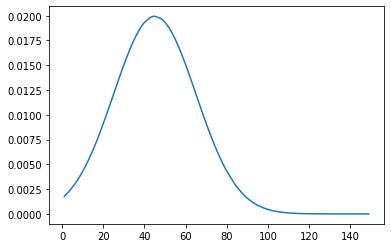

In [16]:
#We can plot values of the kernel against the values of the inputs, for which we want to build around the target value,
#where the target value=45
Kernel_values1=Gauss_(45,x_target,20)
Kernel_values2=Gauss_(45,x_target,10)
Kernel_values3=Gauss_(45,x_target,5)
Kernel_values4=Gauss_(45,x_target,1)
plt.plot(x_target,Kernel_values1)
plt.show()
#x=sum(Kernel_values)
#print(x)
#this Gaussian kernel function puts the highest weight on values closest to the to our target x values

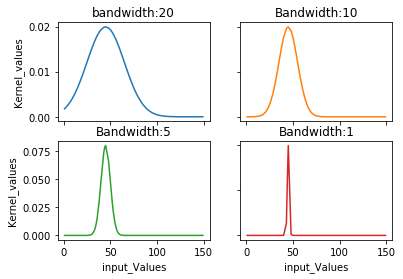

In [17]:
#Comparing various bandwidth sizes( for the gaussian kernel)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x_target, Kernel_values1)
axs[0, 0].set_title('bandwidth:20')
axs[0, 1].plot(x_target,Kernel_values2 , 'tab:orange')
axs[0, 1].set_title('Bandwidth:10')
axs[1, 0].plot(x_target,Kernel_values3, 'tab:green')
axs[1, 0].set_title('Bandwidth:5')
axs[1, 1].plot(x_target, Kernel_values4, 'tab:red')
axs[1, 1].set_title('Bandwidth:1')

for ax in axs.flat:
    ax.set(xlabel='input_Values', ylabel='Kernel_values')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
#We can see that as the bandwidth shrinks, the variance in the kernel also shrinks, which should make intuitive sense

In [18]:
#Defining a more general function here: this function takes in a kernel,a number and a list, and returns a list of the kernel
#values: depending on which kernel has been specified.
def non_parametric(kernel,number,list_1):
    values=[]
    for i in list_1:
            u=abs(i-number)
            kernel(u)
            values.append(kernel(u))
    return values
#just saving the kernel values in a list. nothing too fancy...    
x_tri=non_parametric(triweight,0.8,x_float)
x_ep=non_parametric(epanechnikov,0.8,x_float)
x_bi=non_parametric(biweight,0.8,x_float)
x_uni=non_parametric(uniform,0.8,x_float)

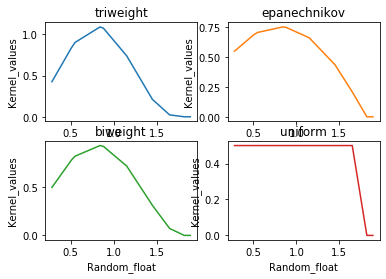

In [19]:
#lets compare all of the kernels now in graphical form,if the target value that we want to predict around is 0.8
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x_float,x_tri )
axs[0, 0].set_title('triweight')
axs[0, 1].plot(x_float,x_ep , 'tab:orange')
axs[0, 1].set_title('epanechnikov')
axs[1, 0].plot(x_float,x_bi, 'tab:green')
axs[1, 0].set_title('biweight')
axs[1, 1].plot(x_float, x_uni, 'tab:red')
axs[1, 1].set_title('uniform')

for ax in axs.flat:
    ax.set(xlabel='Random_float', ylabel='Kernel_values')

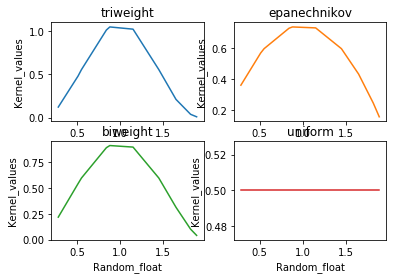

In [20]:
#if the target value is 1
x_tri1=non_parametric(triweight,1,x_float)
x_ep1=non_parametric(epanechnikov,1,x_float)
x_bi1=non_parametric(biweight,1,x_float)
x_uni1=non_parametric(uniform,1,x_float)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x_float,x_tri1 )
axs[0, 0].set_title('triweight')
axs[0, 1].plot(x_float,x_ep1 , 'tab:orange')
axs[0, 1].set_title('epanechnikov')
axs[1, 0].plot(x_float,x_bi1, 'tab:green')
axs[1, 0].set_title('biweight')
axs[1, 1].plot(x_float, x_uni1, 'tab:red')
axs[1, 1].set_title('uniform')

for ax in axs.flat:
    ax.set(xlabel='Random_float', ylabel='Kernel_values')

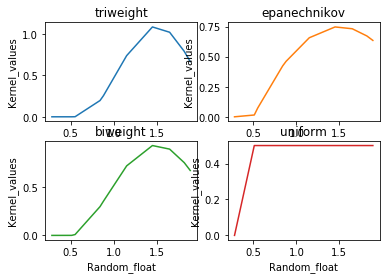

In [21]:
#if the target value is 1.5
x_tri2=non_parametric(triweight,1.5,x_float)
x_ep2=non_parametric(epanechnikov,1.5,x_float)
x_bi2=non_parametric(biweight,1.5,x_float)
x_uni2=non_parametric(uniform,1.5,x_float)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x_float,x_tri2 )
axs[0, 0].set_title('triweight')
axs[0, 1].plot(x_float,x_ep2 , 'tab:orange')
axs[0, 1].set_title('epanechnikov')
axs[1, 0].plot(x_float,x_bi2, 'tab:green')
axs[1, 0].set_title('biweight')
axs[1, 1].plot(x_float, x_uni2, 'tab:red')
axs[1, 1].set_title('uniform')

for ax in axs.flat:
    ax.set(xlabel='Random_float', ylabel='Kernel_values')

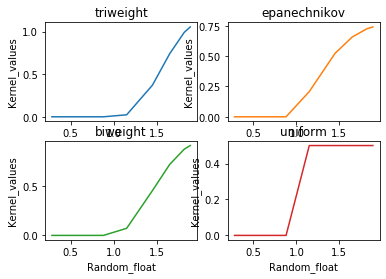

In [22]:
#if the target value is 2
x_tri3=non_parametric(triweight,2,x_float)
x_ep3=non_parametric(epanechnikov,2,x_float)
x_bi3=non_parametric(biweight,2,x_float)
x_uni3=non_parametric(uniform,2,x_float)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x_float,x_tri3 )
axs[0, 0].set_title('triweight')
axs[0, 1].plot(x_float,x_ep3 , 'tab:orange')
axs[0, 1].set_title('epanechnikov')
axs[1, 0].plot(x_float,x_bi3, 'tab:green')
axs[1, 0].set_title('biweight')
axs[1, 1].plot(x_float, x_uni3, 'tab:red')
axs[1, 1].set_title('uniform')

for ax in axs.flat:
    ax.set(xlabel='Random_float', ylabel='Kernel_values')

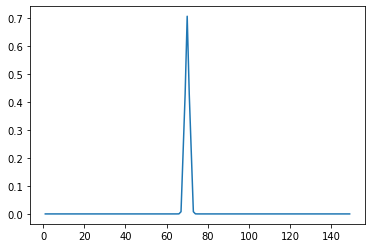

In [23]:
#A toy Gaussian model. Not much to see here.
x_gauss=non_parametric(gaussian,70,x_target)
plt.plot(x_target,x_gauss)
plt.show()

In [18]:
#In conclusion we can say that the choice of bandwidth is very specific to the problem that we are tackling but that in general,
#a smaller bandwidth reduces the variance of the Kernel.
#We have also run experiments to show how different Kernels behave when we tweak certain parameters: the results are as above.
#From the above, we can see that the Gaussian Kernel is smooth. That may explain why it is commonly used.